In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [39]:
data=pd.read_csv('ex2data1.txt',header=None,names=['Exam 1 Score','Exam 2 Score','Admitted/Not Admitted'])

In [40]:
data.head()

,Exam 1 Score,Exam 2 Score,Admitted/Not Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam 2 Score')

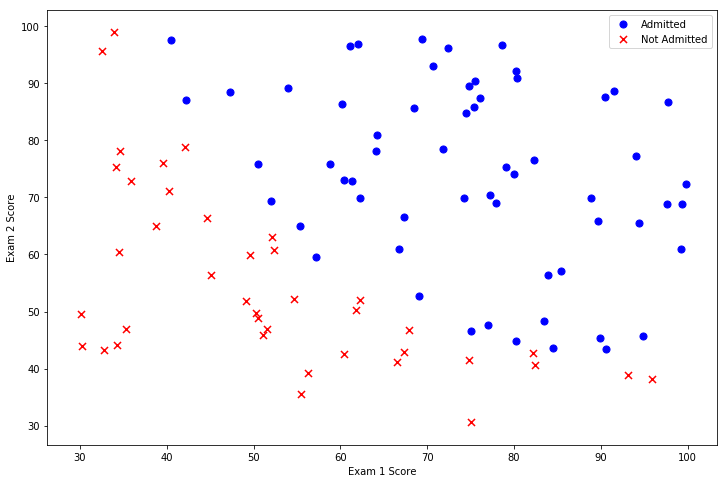

In [5]:
admitted=data[data['Admitted/Not Admitted'].isin([1])]
notadmitted=data[data['Admitted/Not Admitted'].isin([0])]
figure,axes=plt.subplots(figsize=(12,8))
axes.scatter(admitted['Exam 1 Score'],admitted['Exam 2 Score'],s=50,c='b',marker='o',label='Admitted')
axes.scatter(notadmitted['Exam 1 Score'],notadmitted['Exam 2 Score'],s=50,c='r',marker='x',label='Not Admitted')
axes.legend()
axes.set_xlabel('Exam 1 Score')
axes.set_ylabel('Exam 2 Score')

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def costfunction(theta,X,y):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    first=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second=np.multiply((1-y),np.log(sigmoid(1-sigmoid(X*theta.T))))
    return np.sum(first-second)/len(X)

In [8]:
data.insert(0,'Ones',1)

In [9]:
cols=data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [10]:
X.head()

,Ones,Exam 1 Score,Exam 2 Score
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


In [11]:
y.head()

,Admitted/Not Admitted
0,0
1,0
2,0
3,1
4,1


In [12]:
X=np.array(X.values)
y=np.array(y.values)
theta=np.zeros(3)

In [13]:
theta.shape

(3,)

In [14]:
costfunction(theta,X,y)

0.6055191020080098

In [15]:
def gradient(theta,X,y):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    error=sigmoid(X*theta.T)-y
    for i in range(parameters):
        temp=np.multiply(error,X[:,i])
        grad[i]=np.sum(temp)/len(X)
    return grad

In [16]:
import scipy.optimize as opt
res=opt.fmin_tnc(func=costfunction,x0=theta,fprime=gradient,args=(X,y))

In [17]:
costfunction(res[0],X,y)

0.30742409938684573

In [18]:
res

(array([-5.96093824,  0.08850419,  0.01879109]), 55, 4)

In [19]:
def predicts(theta,X):
    probabiltiy=sigmoid(X*theta.T)
    return [1 if x>=0.5 else 0 for x in probabiltiy]
theta_min=np.matrix(res[0])
prediction=predicts(theta_min,X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(prediction, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print("accuracy = {0}".format(accuracy))

accuracy = 83


In [20]:
theta_min

matrix([[-5.96093824,  0.08850419,  0.01879109]])

Text(0, 0.5, 'Exam 2 Score')

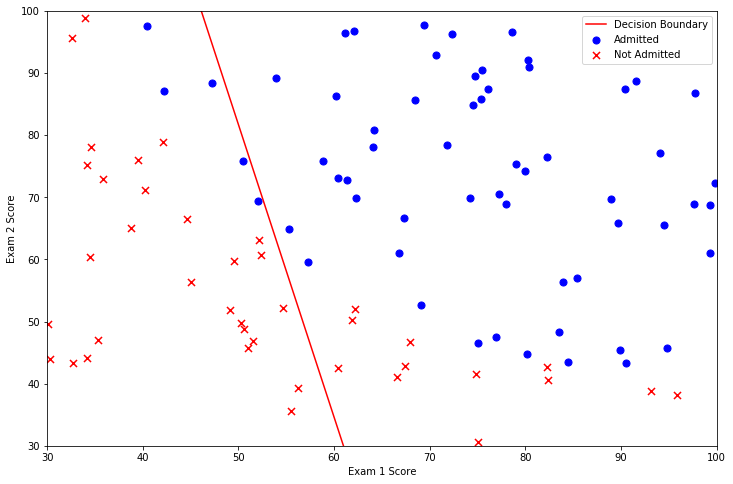

In [22]:
admitted=data[data['Admitted/Not Admitted'].isin([1])]
notadmitted=data[data['Admitted/Not Admitted'].isin([0])]
figure,axes=plt.subplots(figsize=(12,8))
axes.scatter(admitted['Exam 1 Score'],admitted['Exam 2 Score'],s=50,c='b',marker='o',label='Admitted')
axes.scatter(notadmitted['Exam 1 Score'],notadmitted['Exam 2 Score'],s=50,c='r',marker='x',label='Not Admitted')
plot_x = np.linspace(X[:,2].min(), X[:,2].max(),20)
plot_y = -(theta_min[0,0]+theta_min[0,1]*plot_x)/theta_min[0,2]
#print(min(plot_y),max(plot_y))
axes.plot(plot_x,plot_y,'r',label='Decision Boundary')
axes.set(xlim=(30, 100), ylim=(30, 100))
axes.legend()
axes.set_xlabel('Exam 1 Score')
axes.set_ylabel('Exam 2 Score')

In [119]:
data2=pd.read_csv("ex2data2.txt",header=None,names=['Test1','Test2','Accepted'])

In [120]:
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


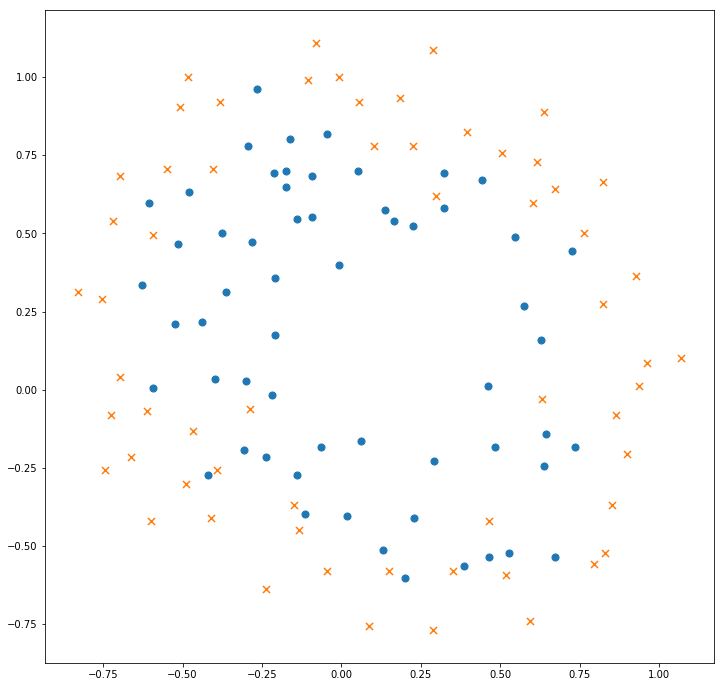

In [121]:
pos=data2[data2['Accepted']==1]
neg=data2[data2['Accepted']==0]
fig,ax=plt.subplots(figsize=(12,12))
ax.scatter(pos['Test1'],pos['Test2'],s=50,marker='o',label='Accepted')
ax.scatter(neg['Test1'],neg['Test2'],s=50,marker='x',label='Rejected')

In [122]:
degree=5
x1=data2['Test1']
x2=data2['Test2']
data2.insert(3,'Ones',1)
for i in range(1,degree):
    for j in range(0,i):
        data2['F'+str(i)+str(j)]=np.power(x1,i-j)*np.power(x2,j)
data2.drop('Test1',axis=1,inplace=True)
data2.drop('Test2',axis=1,inplace=True)
data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [123]:
def costReg(theta,X,y,learningRate):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    first=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    reg=(lambd/2*len(X))*np.sum(np.power(theta[:,1:theta.shape[1]],2))
    return np.sum(first-second)/(len(X))+reg

In [124]:
def gradientReg(theta,X,y,learningRate):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    error=sigmoid(X*theta.T)-y
    for i in range(parameters):
        term =np.multiply(error,X[:,i])
        if(i==0):
            grad[i]=np.sum(term)/len(X)
        else:
            grad[i]=(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
    return grad

In [125]:
cols=data2.shape[1]
X2=data2.iloc[:,1:cols]
y2=data2.iloc[:,0:1]
X2=np.array(X2.values)
y2=np.array(y2.values)

In [130]:
theta2=np.zeros(11)
learningRate=1
costReg(theta2,X2,y2,learningRate)

0.6931471805599454

In [131]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))

In [128]:
theta2=np.matrix(result2[0])
predictions=predicts(theta_min2,X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print("accuracy = {0}".format(accuracy))

accuracy = 77
